In [1]:
import numpy as np
import pandas as pd 

from fbprophet import Prophet

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read CSV Data

In [2]:
df = pd.read_csv('./BOT_OUTPUT_DATA/Pune.csv')

In [3]:
df.head()

,ds,y
0,2016-1-1,444
1,2016-1-2,444
2,2016-1-3,444
3,2016-1-4,444
4,2016-1-5,444


#### Drop NULL values

In [4]:
df.dropna()
df.count()

ds    2555
y     2555
dtype: int64

#### Make Predictor

In [5]:
m = Prophet(daily_seasonality=True)

In [6]:
m.fit(df)

/Users/suyashlawand/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.0122


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5632.17    0.00505705       132.897      0.7217      0.7217      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5638.01   0.000500203       100.596      0.4904      0.4904      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5640.13   0.000155208       289.214   5.544e-07       0.001      344  LS failed, Hessian reset 
     299       5640.98   2.57398e-05       39.9678        0.13           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     394       5641.71   0.000212025       210.124   2.084e-06       0.001      570  LS failed, Hessian reset 
     399       5641.83   0.000357495       343.036      0.9914      0.9914      575   
    Iter      log prob        ||dx||      ||grad||       alpha

In [13]:
forecast = m.make_future_dataframe(periods=365)
forecast = m.predict(forecast)

forecast.tail(30)

/Users/suyashlawand/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/suyashlawand/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2890,2023-12-02,514.582501,479.714033,582.614488,502.434246,526.707087,15.347775,15.347775,15.347775,-27.804379,...,-0.655482,-0.655482,-0.655482,43.807636,43.807636,43.807636,0.0,0.0,0.0,529.930276
2891,2023-12-03,514.586693,478.167692,581.423125,502.395701,526.822074,15.245905,15.245905,15.245905,-27.804379,...,-0.545468,-0.545468,-0.545468,43.595752,43.595752,43.595752,0.0,0.0,0.0,529.832598
2892,2023-12-04,514.590885,476.954188,579.689908,502.357157,526.938745,15.460690,15.460690,15.460690,-27.804379,...,-0.302330,-0.302330,-0.302330,43.567399,43.567399,43.567399,0.0,0.0,0.0,530.051575
2893,2023-12-05,514.595077,481.523098,585.727523,502.296679,527.055416,16.371648,16.371648,16.371648,-27.804379,...,0.458675,0.458675,0.458675,43.717351,43.717351,43.717351,0.0,0.0,0.0,530.966725
2894,2023-12-06,514.599269,480.323761,580.507623,502.238524,527.120300,17.046040,17.046040,17.046040,-27.804379,...,0.814058,0.814058,0.814058,44.036361,44.036361,44.036361,0.0,0.0,0.0,531.645310
2895,2023-12-07,514.603462,482.266168,584.469715,502.190468,527.175373,17.311916,17.311916,17.311916,-27.804379,...,0.604783,0.604783,0.604783,44.511513,44.511513,44.511513,0.0,0.0,0.0,531.915378
2896,2023-12-08,514.607654,480.157164,579.311558,502.148341,527.230446,16.948030,16.948030,16.948030,-27.804379,...,-0.374236,-0.374236,-0.374236,45.126646,45.126646,45.126646,0.0,0.0,0.0,531.555684
2897,2023-12-09,514.611846,481.027020,585.855632,502.112433,527.285518,17.402978,17.402978,17.402978,-27.804379,...,-0.655482,-0.655482,-0.655482,45.862839,45.862839,45.862839,0.0,0.0,0.0,532.014824
2898,2023-12-10,514.616038,480.685902,584.036269,502.076526,527.340591,18.349095,18.349095,18.349095,-27.804379,...,-0.545468,-0.545468,-0.545468,46.698942,46.698942,46.698942,0.0,0.0,0.0,532.965133
2899,2023-12-11,514.620230,486.069595,588.510155,501.997189,527.395664,19.505422,19.505422,19.505422,-27.804379,...,-0.302330,-0.302330,-0.302330,47.612131,47.612131,47.612131,0.0,0.0,0.0,534.125653


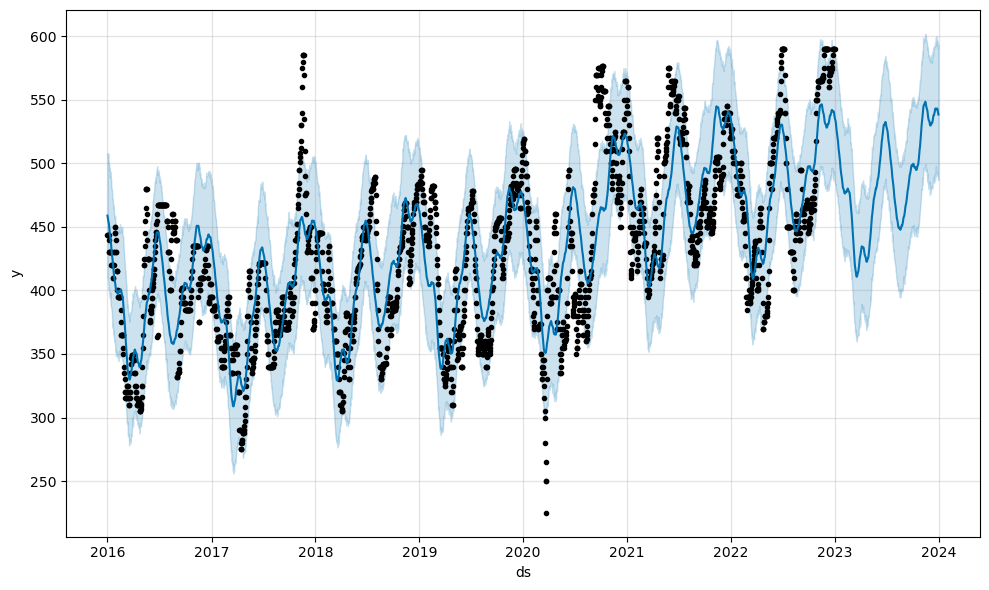

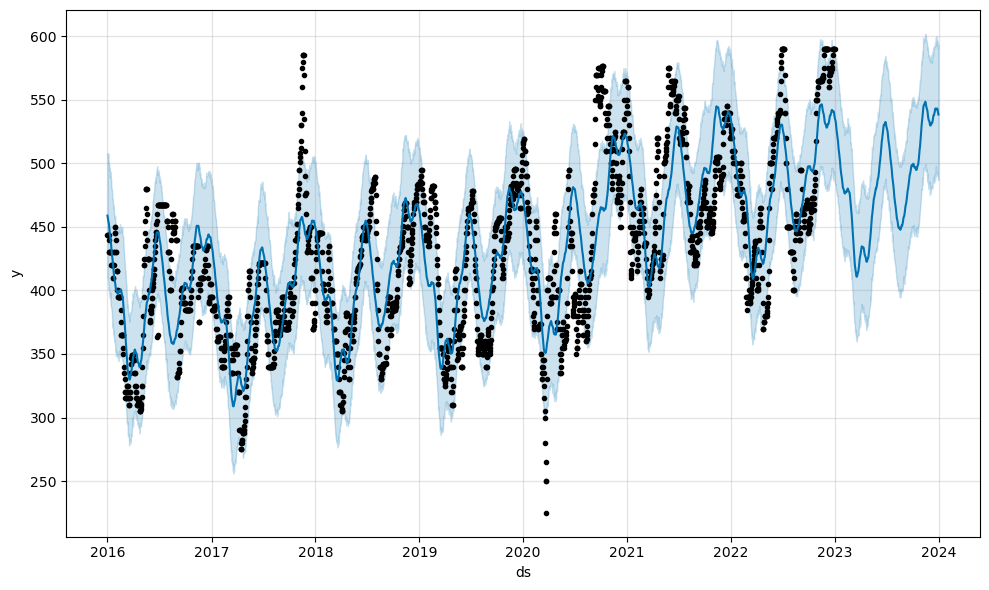

In [14]:
m.plot(forecast)